Nama    : Jennifer Ardelia Limicia\
NIM     : 2602105090\
Kelas   : LB09\
Dataset D (Perempuan Genap)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [4]:
df = pd.read_csv("data_D.csv")
df

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,41254,105680,15671769,Nkemdirim,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,41255,70760,15570299,Martin,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,41256,3091,15807593,Tseng,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,41257,20130,15583460,Nwankwo,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0


# Check Null Value dan Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [6]:
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

# Drop column

Column-column yang di drop adalah column-column yang berupa ID dan nama karena tidak akan berpengaruh pada prediksi nantinya. Apabila disertakan dalam modelling nanti, takutnya akan merusak model.

In [7]:
df.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
...,...,...,...,...,...,...,...,...,...,...,...
41254,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0


# Check unique value

In [20]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
    elif "int" in str(df[col].dtype) or "float" in str(df[col].dtype):
        num.append(col)
        
print(cat)
print(num)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'churn']


In [21]:
cat.extend(['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn'])

for i in ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn']:
    num.remove(i)

print(cat)
print(num)

['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn']
['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [22]:
for col in cat:
  print('------' + col.upper() + '------')
  print(df[col].value_counts())
  print()

------GEOGRAPHY------
Geography
France     23520
Spain       9081
Germany     8658
Name: count, dtype: int64

------GENDER------
Gender
Male      23166
Female    18093
Name: count, dtype: int64

------TENURE------
Tenure
2     4588
4     4442
7     4431
5     4291
8     4232
3     4231
1     4177
9     4173
6     3970
10    1474
0     1250
Name: count, dtype: int64

------NUMOFPRODUCTS------
NumOfProducts
2    21132
1    19316
3      694
4      117
Name: count, dtype: int64

------HASCRCARD------
HasCrCard
1    31126
0    10133
Name: count, dtype: int64

------ISACTIVEMEMBER------
IsActiveMember
0    20767
1    20492
Name: count, dtype: int64

------CHURN------
churn
0    32540
1     8719
Name: count, dtype: int64



# Check Outlier

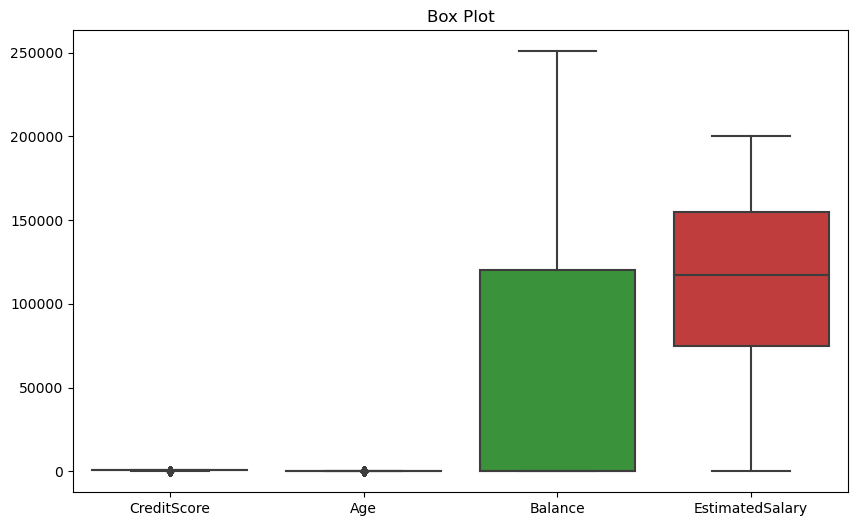

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num])
plt.title('Box Plot')
plt.show()

# Check Correlation

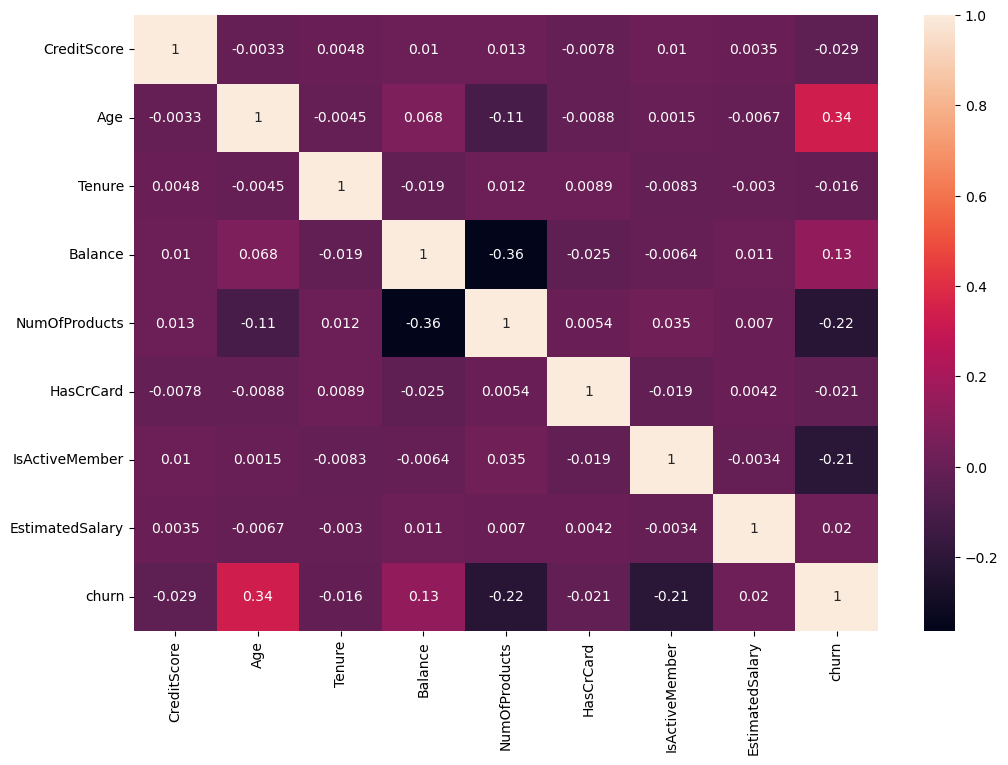

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True)
plt.show()

# Split Data

In [32]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
...,...,...,...,...,...,...,...,...,...,...,...
41254,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0


In [33]:
x = df.drop(['churn'], axis=1)
y = df['churn']

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(33007, 10) (33007,)
(8252, 10) (8252,)


# Encode

In [35]:
from sklearn.preprocessing import OneHotEncoder

OHE_encode = ['Geography', 'Gender']

for col in OHE_encode:
  encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
  # Fit and transform the 'Gender' column for each DataFrame
  encoded_train = encoder.fit_transform(x_train[[col]])
  encoded_test = encoder.transform(x_test[[col]])

  columns_to_drop = [col]

  # Reset indices before concatenation
  x_train = x_train.reset_index(drop=True)
  x_test = x_test.reset_index(drop=True)
  x_train = pd.concat([x_train.drop(columns=columns_to_drop), pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(columns_to_drop))], axis=1)
  x_test = pd.concat([x_test.drop(columns=columns_to_drop), pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(columns_to_drop))], axis=1)

c:\Users\jenni\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\jenni\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,708.0,45.0,2,0.00,1,1,0,182076.97,1.0,0.0,0.0,1.0,0.0
1,676.0,35.0,7,0.00,2,1,0,166053.92,0.0,0.0,1.0,0.0,1.0
2,645.0,36.0,4,133980.80,1,1,1,112333.63,1.0,0.0,0.0,1.0,0.0
3,791.0,37.0,1,0.00,2,1,0,132973.17,0.0,0.0,1.0,0.0,1.0
4,637.0,48.0,7,0.00,2,1,1,146573.66,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33002,704.0,43.0,3,0.00,2,0,1,47775.17,1.0,0.0,0.0,1.0,0.0
33003,619.0,29.0,3,98955.87,2,0,0,131712.51,0.0,1.0,0.0,0.0,1.0
33004,791.0,42.0,0,113657.41,1,0,1,139946.68,0.0,1.0,0.0,0.0,1.0
33005,587.0,35.0,7,0.00,3,1,1,53387.90,1.0,0.0,0.0,0.0,1.0


In [38]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,680.0,32.0,2,0.00,2,0,1,38614.69,0.0,0.0,1.0,1.0,0.0
1,605.0,32.0,3,0.00,2,1,0,138051.19,1.0,0.0,0.0,0.0,1.0
2,826.0,39.0,8,113905.48,2,0,1,174043.40,0.0,1.0,0.0,1.0,0.0
3,697.0,44.0,3,0.00,1,1,1,143357.07,0.0,0.0,1.0,0.0,1.0
4,550.0,56.0,2,103391.38,1,1,0,90878.13,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,790.0,48.0,7,116932.59,1,1,0,91092.84,0.0,0.0,1.0,0.0,1.0
8248,687.0,33.0,0,135962.40,2,1,0,121747.96,0.0,1.0,0.0,0.0,1.0
8249,577.0,38.0,3,0.00,2,1,1,187905.87,1.0,0.0,0.0,0.0,1.0
8250,775.0,33.0,1,0.00,2,1,0,100183.05,1.0,0.0,0.0,0.0,1.0


# Scaling

In [39]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

continous = ['CreditScore', 'Balance', 'EstimatedSalary']

for col in continous:
  scaler = MinMaxScaler()
  x_train_scaled[col] = scaler.fit_transform(x_train_scaled[col].values.reshape(-1, 1))
  x_test_scaled[col] = scaler.transform(x_test_scaled[col].values.reshape(-1, 1))